In [18]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [19]:
from models.embedding import EmbeddingHelper, EmbeddingType, TemplateType, EmbeddingModel

In [44]:
eh = EmbeddingHelper()
user_vectors = eh.fit(EmbeddingType.USER, TemplateType.BASIC, EmbeddingModel.INSTRUCTOR_BGE_SMALL)
user_vectors.shape

(339, 384)

(339, 384)
(339, 3)


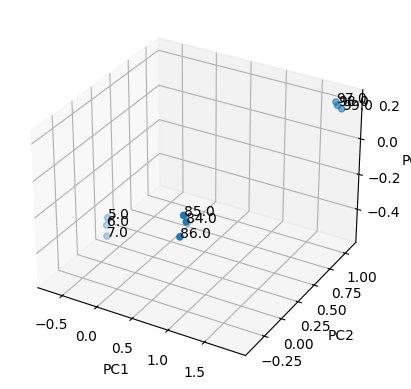

In [40]:

# 生成随机数据作为示例
num_users = 339
users_ids = np.arange(1, num_users + 1)

user_vectors = np.array(user_vectors)
print(user_vectors.shape)
# 使用PCA进行降维
pca = PCA(n_components=3)
users_vectors_3d = pca.fit_transform(user_vectors)
print(users_vectors_3d.shape)

# # 创建包含用户ID和位置的DataFrame

def gen_data(users:list):
    df = pd.DataFrame({'User ID': users,
                    'PC1': users_vectors_3d[users, 0],
                    'PC2': users_vectors_3d[users, 1],
                    'PC3': users_vectors_3d[users, 2]})
    return df

# # 可视化用户位置
df = gen_data([5,6,7,84,85,86,97,98,99])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PC1'], df['PC2'], df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# # 在每个点上添加用户ID标签
for i, row in df.iterrows():
    ax.text(row['PC1'], row['PC2'], row['PC3'], str(row['User ID']))